<a href="https://colab.research.google.com/github/bustanularifin666/MachineLearningTasks/blob/main/TaskWeek6/K_Means_Clustering_23_EPL_Players_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Muhammad Bustanul Arifin Nur Fathurrahman
1103228224

beri kode untuk menghubungkan google colab dengan google drive

In [24]:
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Beri kode untuk membaca dataset dan mengubah dataset sebagai dataframe

In [25]:
# Ganti 'nama_file.csv' dengan nama file dataset yang sesuai
file_path = '/content/drive/MyDrive/Dataset/PL23_players_stats.csv'

# Membaca dataset dan mengubahnya menjadi DataFrame
df = pd.read_csv(file_path)

# Sekarang Anda memiliki dataset dalam bentuk DataFrame yang siap untuk dianalisis
df.head()

,Team,JerseyNo,Player,Position,Apearances,Substitutions,Goals,Penalties,YellowCards,RedCards
0,Arsenal,7,Bukayo Saka,Defender/Midfielder,40,3,12,2,6.0,0.0
1,Arsenal,6,Gabriel,Defender,37,1,5,0,7.0,1.0
2,Arsenal,32,Aaron Ramsdale,Goalkeeper,37,0,0,0,1.0,0.0
3,Arsenal,4,Ben White,Defender,37,0,0,0,3.0,0.0
4,Arsenal,8,Martin Odegaard,Midfielder,36,4,7,0,4.0,0.0


In [26]:
df=df.drop(['Substitutions', 'YellowCards', 'RedCards', 'Player', 'JerseyNo', 'Penalties'],axis=1)
df.head()

,Team,Position,Apearances,Goals
0,Arsenal,Defender/Midfielder,40,12
1,Arsenal,Defender,37,5
2,Arsenal,Goalkeeper,37,0
3,Arsenal,Defender,37,0
4,Arsenal,Midfielder,36,7


In [27]:
#Hapus missing value
#Drop baris dengan nilai 'goals' < 5
df = df.loc[(df[['Goals']] >= 5).all(axis=1)]

#cek ukuran data untuk memastikan baris sudah di-drop
df.shape

(98, 4)

In [28]:
df.head()

,Team,Position,Apearances,Goals
0,Arsenal,Defender/Midfielder,40,12
1,Arsenal,Defender,37,5
4,Arsenal,Midfielder,36,7
6,Arsenal,Forward,26,6
8,Arsenal,Midfielder,24,11


Beri kode untuk memvisualisasikan elbow method dengan maksimal jumlah k=10 pada dataframe bernama df, dan nama columns 'Apearances', 'Goals'.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

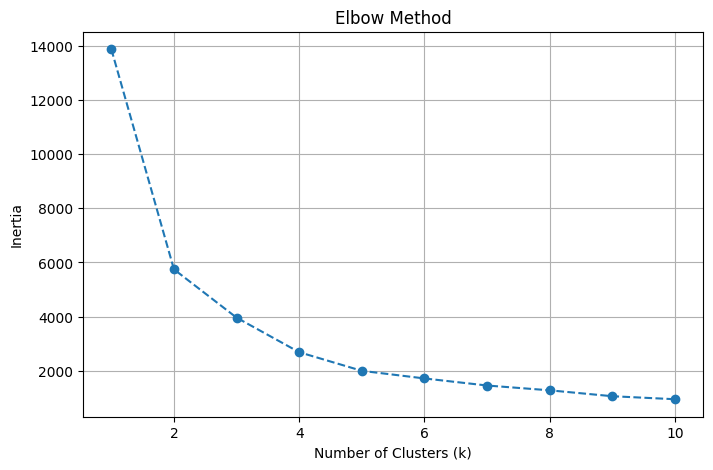

In [29]:
# Mengambil data yang akan digunakan untuk clustering
data = df[['Apearances', 'Goals']]

# Menginisialisasi list untuk menyimpan nilai inersia (inertia) untuk setiap nilai k
inertia = []

# Melakukan perulangan untuk berbagai nilai k dari 1 hingga 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

# Membuat plot elbow method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

dengan dataframe bernama df, beri kode untuk membuat model k means clustering yang berisi atribut 'Apearances', 'Goals'; jumlah cluster=5; dan beri kolom baru bernama label dan visualisasikan berdasarkan label.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


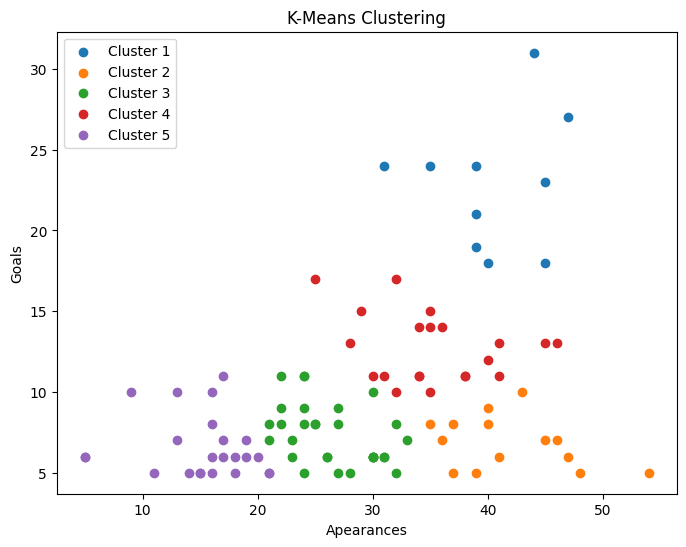

In [30]:
# Pilih atribut yang akan digunakan
attributes = df[['Apearances', 'Goals']]

# Standarisasi atribut
scaler = StandardScaler()
attributes_scaled = scaler.fit_transform(attributes)

# Inisialisasi model K-Means dengan 5 cluster
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit model ke data
kmeans.fit(attributes_scaled)

# Menambahkan kolom label ke DataFrame
df['label'] = kmeans.labels_

# Memvisualisasikan data berdasarkan label
plt.figure(figsize=(8, 6))

# Membuat plot untuk setiap cluster
for label in range(5):
    plt.scatter(df[df['label'] == label]['Apearances'], df[df['label'] == label]['Goals'], label=f'Cluster {label + 1}')

plt.title('K-Means Clustering')
plt.xlabel('Apearances')
plt.ylabel('Goals')
plt.legend()
plt.show()

Beri kode untuk menghitung nilai sillhouette score untuk k=2 hingga k=10

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

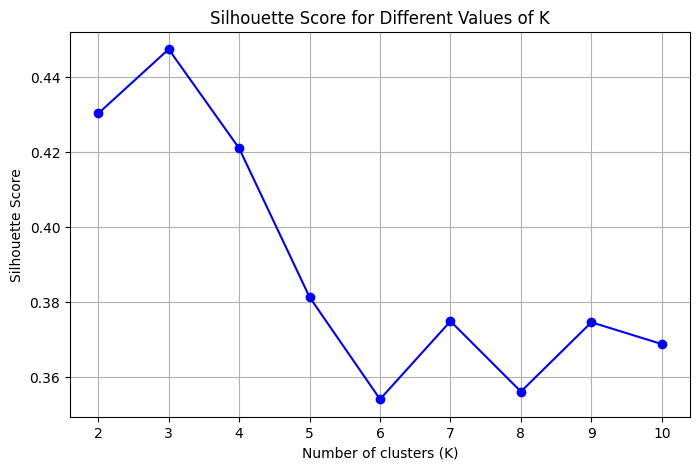

In [31]:
# Inisialisasi daftar untuk menyimpan nilai Silhouette Score
silhouette_scores = []

# Mencoba nilai K dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(attributes_scaled)
    silhouette_avg = silhouette_score(attributes_scaled, labels)
    silhouette_scores.append(silhouette_avg)

# Memplot hasil Silhouette Score untuk setiap nilai K
plt.figure(figsize=(8, 5))
plt.plot(np.arange(2, 11), silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score for Different Values of K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

Beri kode untuk menghitung nilai Davies Bouldin Index score untuk k=2 hingga k=10

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

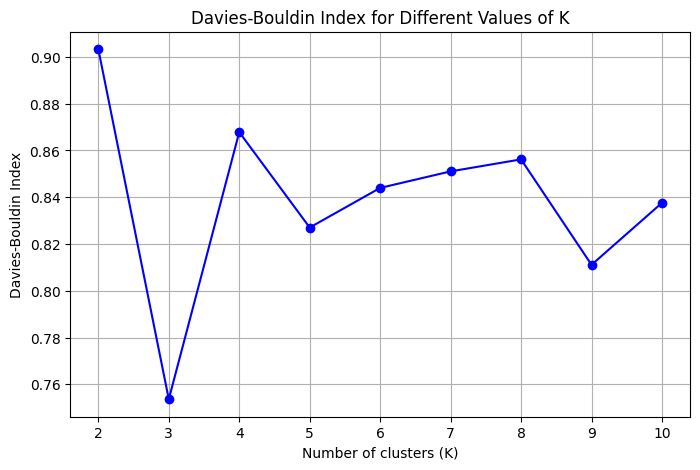

In [32]:
# Inisialisasi daftar untuk menyimpan nilai Davies-Bouldin Index
davies_bouldin_scores = []

# Mencoba nilai K dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(attributes_scaled)
    dbi_score = davies_bouldin_score(attributes_scaled, labels)
    davies_bouldin_scores.append(dbi_score)

# Memplot hasil Davies-Bouldin Index untuk setiap nilai K
plt.figure(figsize=(8, 5))
plt.plot(np.arange(2, 11), davies_bouldin_scores, marker='o', linestyle='-', color='b')
plt.title('Davies-Bouldin Index for Different Values of K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Davies-Bouldin Index')
plt.grid()
plt.show()

Beri kode untuk menghitung nilai Calinski-Harabasz Index score untuk k=2 hingga k=10

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

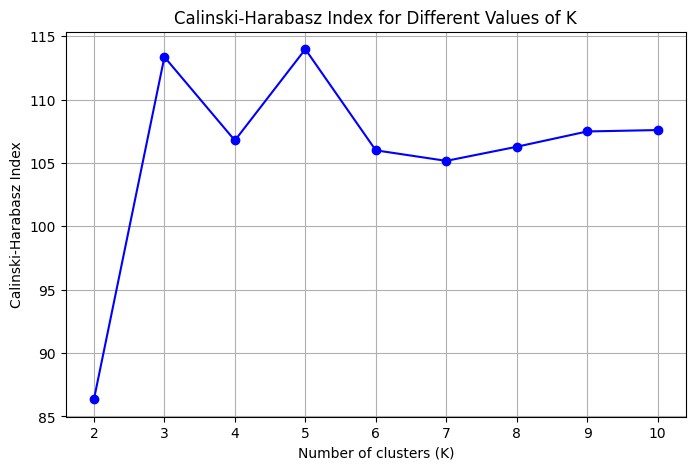

In [33]:
# Inisialisasi daftar untuk menyimpan nilai Calinski-Harabasz Index
ch_scores = []

# Mencoba nilai K dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(attributes_scaled)
    ch_score = calinski_harabasz_score(attributes_scaled, labels)
    ch_scores.append(ch_score)

# Memplot hasil Calinski-Harabasz Index untuk setiap nilai K
plt.figure(figsize=(8, 5))
plt.plot(np.arange(2, 11), ch_scores, marker='o', linestyle='-', color='b')
plt.title('Calinski-Harabasz Index for Different Values of K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Calinski-Harabasz Index')
plt.grid()
plt.show()